In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
from sklearn.model_selection import train_test_split 
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')

# Problem Statement  
Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"  

In [2]:
df = pd.read_csv(r"C:\Users\Shivani Kharade\Desktop\DS ExcelR\Assignments\Decision Tree\Fraud_check.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


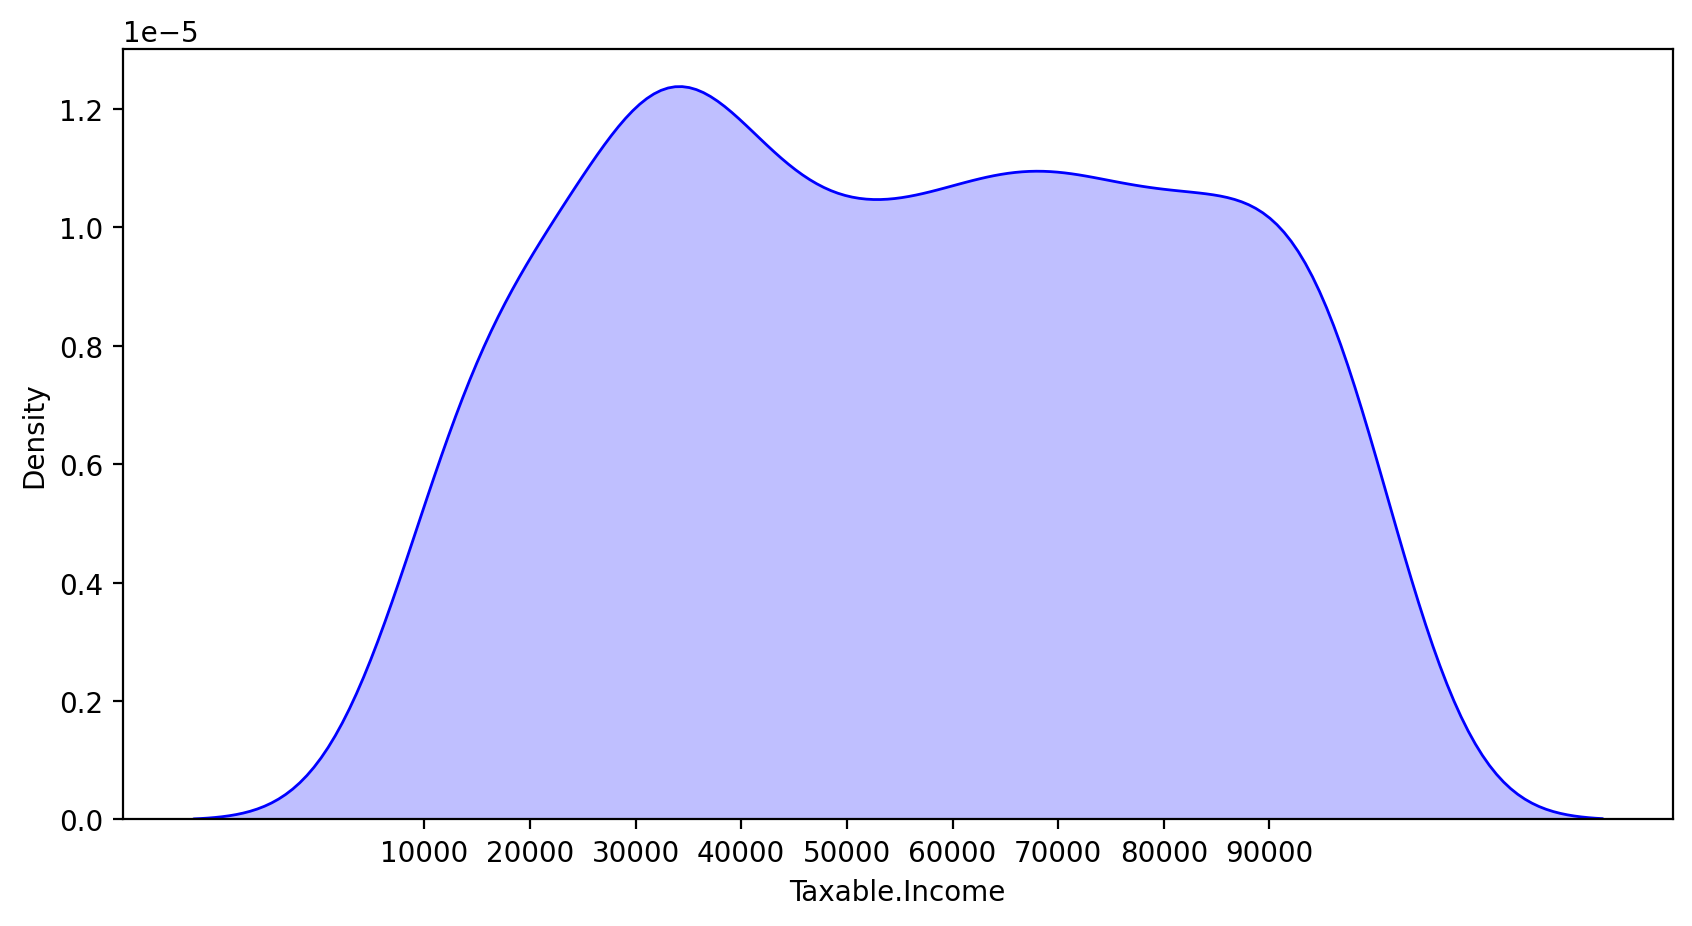

In [7]:
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

In [8]:
label_encoder = preprocessing.LabelEncoder()
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad']) 
df1['Marital.Status']= label_encoder.fit_transform(df1['Marital.Status']) 
df1['Urban']= label_encoder.fit_transform(df1['Urban']) 

In [9]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
df1["Taxable.Income"]=(df1["Taxable.Income"]>30000)*1

In [11]:
# Dropping the target variable from the dataset for modelling
x=df1.drop(axis=1,columns="Taxable.Income")
y=df1["Taxable.Income"]

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [13]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

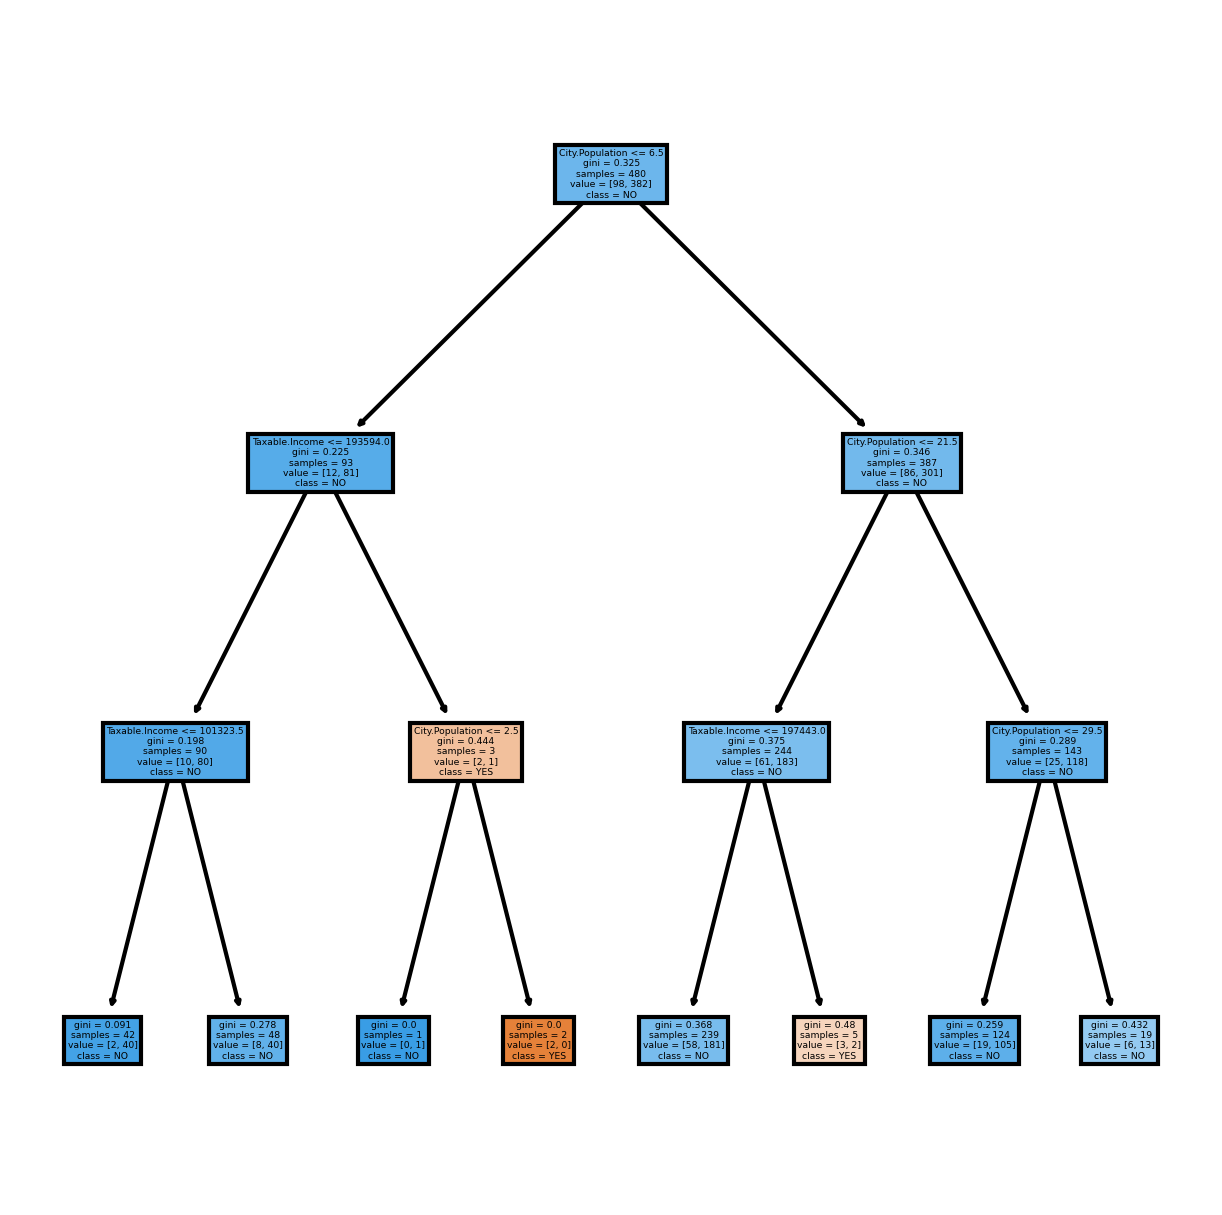

In [14]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [15]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8020833333333334

In [16]:
model.score(x_test, y_test)

0.7833333333333333

In [17]:
model.feature_importances_

array([0.        , 0.        , 0.61086184, 0.38913816, 0.        ])

In [18]:
y_pred = model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7833333333333333)

In [19]:
model.predict([[0,1,1,1,0]])

array([1])

In [20]:
model.predict_proba(x_test)

array([[0.15322581, 0.84677419],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.16666667, 0.83333333],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.31578947, 0.68421053],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.31578947, 0.68421053],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.

In [21]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 0, 26],
       [ 0, 94]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

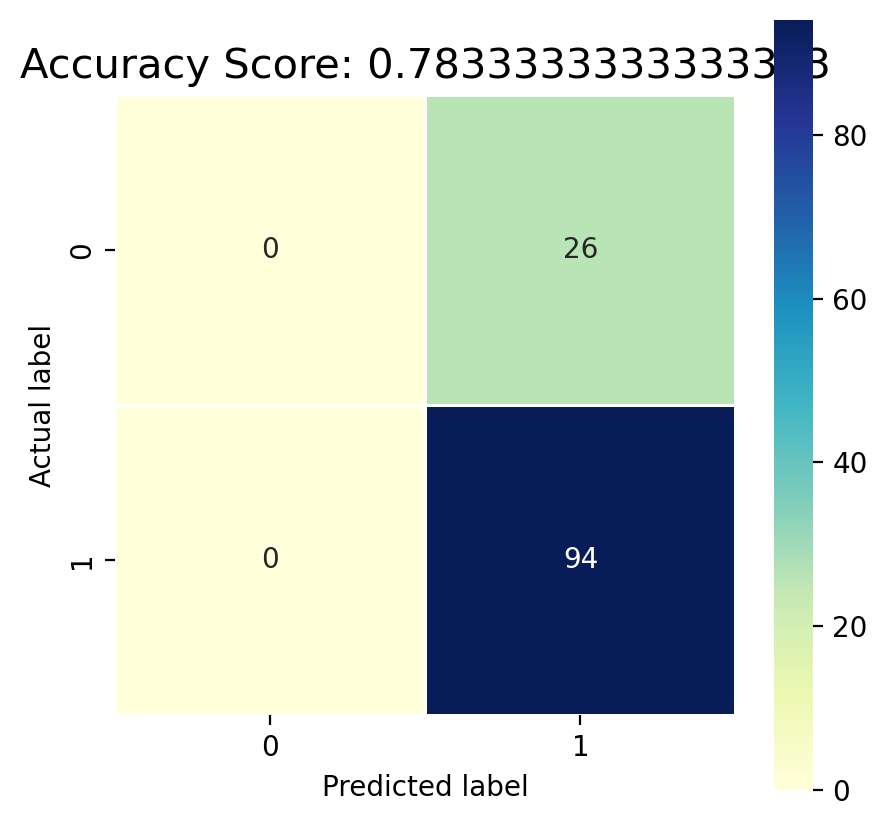

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [23]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [24]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [25]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.741667
8,9,0.833333,0.750000
9,10,0.845833,0.750000


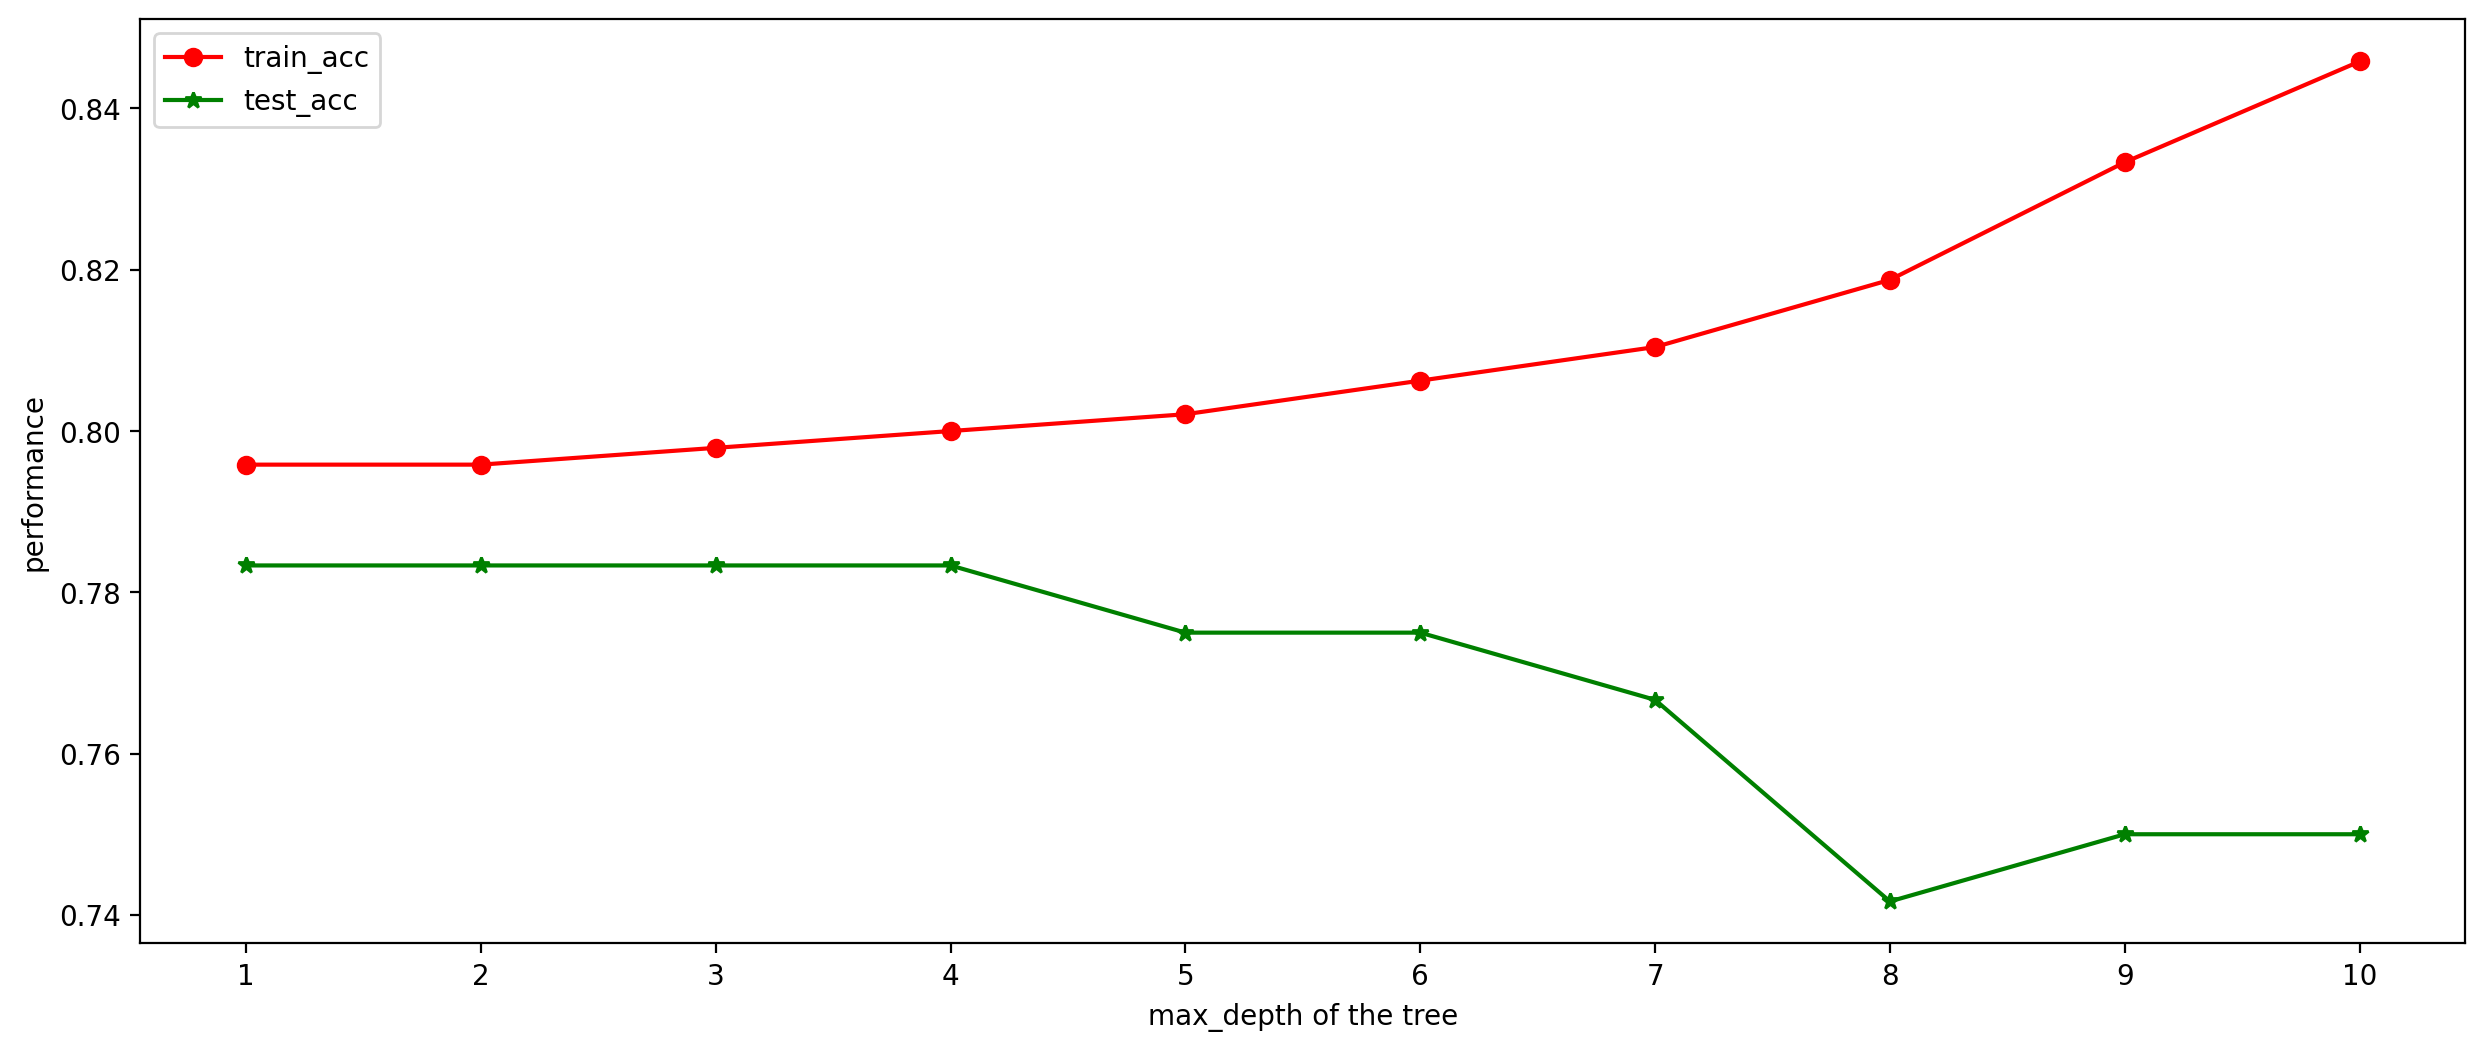

In [26]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o',color='red')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = '*',color='green')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

# Observation
From the range of 1 to 5 of maximum depth it shows the accuracy close to 80%